# Understanding Descriptive Statistics

Import the necessary libraries here:

In [17]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [18]:
# your code here
def function1(n):
    return pd.DataFrame(np.array([random.choice(np.arange(1,10)) for i in range(n)]))

function1(10)



,0
0,5
1,4
2,1
3,2
4,4
5,8
6,4
7,7
8,5
9,2


#### 2.- Plot the results sorted by value.

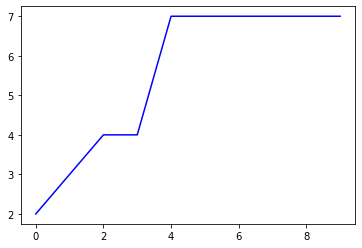

In [19]:
# your code here

result = function1(10).sort_values(by=0).reset_index()[0]
plt.plot(range(len(result)), result, color= 'blue')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(array([0., 1., 1., 2., 0., 0.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <BarContainer object of 6 artists>)

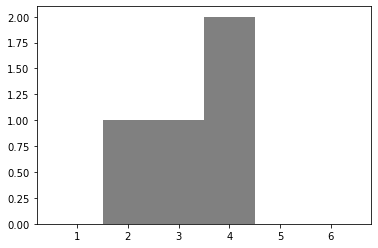

In [20]:
# your code here
plt.hist(result, bins= 6, range=(0.5, 6.5), color= 'gray')

In [21]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [22]:
# your code here

def average(data):
    return sum(data)/len(data)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [41]:
# your code here

def freq(lst):   
    freq_dist = {}
    for x in lst:
        if x in freq_dist:
            freq_dist[x] += 1
        else:
            freq_dist[x] = 1
            
    return freq_dist, sum([k*v for k, v in freq_dist.items()])/sum([v for k, v in freq_dist.items()])

freq_dist, mean_from_freq = freq(result)
print(mean_from_freq)
print(np.mean(result))
#print (freq_dist)


5.5
5.5


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [42]:
# your code here
def median(val):
    
    if len(val) % 2 == 0:
        return sum(val[int(len(val)/2)-1:int(len(val)/2)+1])/2
    
    else:
        return val[int(len(val)/2)]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [43]:
# your code here
def quartiles(vals):
    half = median(vals)
    if len(vals) % 2 == 0:
        first_quartile = median(vals[:int(len(vals)/2)])
        third_quartile = median(vals[int(len(vals)/2):])
    else:
        first_quartile = median(vals[:int(len(vals)/2)-1])
        third_quartile = median(vals[int(len(vals)/2)+1:])
    return first_quartile, half, third_quartile

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:>

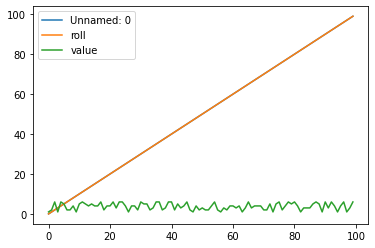

In [44]:
# your code here
dice_df = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_values = sorted(dice_df['value'])

#plt.hist(dice_values, bins=6, range= (0.5, 6.5))
dice_df.plot()



In [45]:
"""
your comments here
"""

'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [49]:
# your code here
#dice_df.describe()
print(average(dice_values))
print(quartiles(dice_values))

3.74
(2.0, 4.0, 5.0)


#### 3.- Now, calculate the frequency distribution.


In [50]:
# your code here
freq_dist = freq(dice_values)

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([29., 14., 22., 35.]),
 array([1.  , 2.25, 3.5 , 4.75, 6.  ]),
 <BarContainer object of 4 artists>)

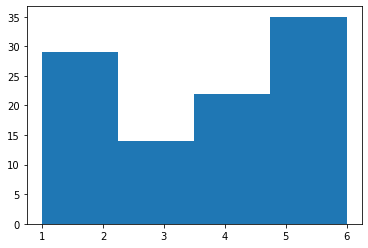

In [52]:
# your code here

#plt.hist(dice_values, bins=6, range= (0.5, 6.5))
#plt.vlines(dice_df['value'].mean(), ymin=0, ymax=25, lw=2)
plt.hist(dice_values, bins=4)


In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [53]:
# your code here
roll_dice = pd.read_csv('../data/roll_the_dice_thousand.csv')
roll_dice

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


(array([342., 175., 168., 315.]),
 array([1.  , 2.25, 3.5 , 4.75, 6.  ]),
 <BarContainer object of 4 artists>)

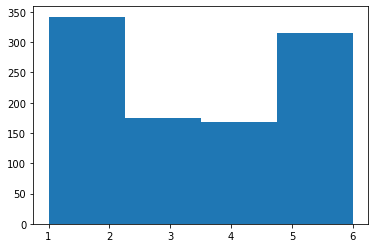

In [54]:
roll_dice1 = sorted(roll_dice['value'])
plt.hist(roll_dice1, bins=4)

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

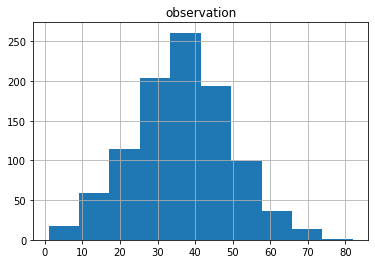

In [62]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv')
ages_population.head()
ages_population.hist()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [58]:
# your code here
mean_ages = ages_population.observation.mean()
mean_ages


12.816499625976762

In [59]:
mean_std = ages_population.observation.std()
mean_std

12.816499625976762

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

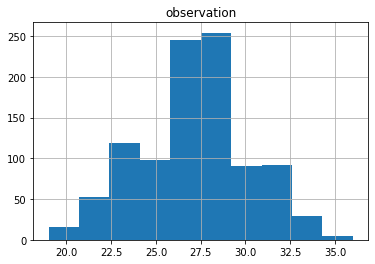

In [63]:
# your code here
ages_population2 = pd.read_csv('../data/ages_population2.csv')
#ages_population2.head()

ages_population2.hist()

In [66]:
mean_ages2 = ages_population2.observation.mean()
mean_ages2


27.155

In [67]:
mean_std2 = ages_population2.observation.std()
mean_std2

2.969813932689186

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [68]:
"""
Similar distribution as age population dataset but mean is lower and ages goes from 19 to 36, on first dataset was form 0 to 80 years old.
"""

'\nSimilar distribution as age population dataset but mean is lower and ages goes from 19 to 36, on first dataset was form 0 to 80 years old.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [70]:
# your code here
print(ages_population2.observation.mean())
print(ages_population2.observation.std())


27.155
2.969813932689186


In [69]:
print(quartiles(ages_population2.observation.sort_values()))
ages_population2.describe()

(25.0, 27.0, 29.0)


,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
I think this distribution is very strange, I believe this data must be from some kind os sport club or something. Max age is 36 an st debiation >2,5 son data range is concentrade
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<AxesSubplot:title={'center':'observation'}>]], dtype=object)

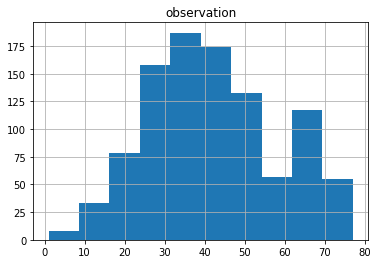

In [71]:
# your code here

ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [72]:
# your code here
print(ages3.observation.mean())
print(ages3.observation.std())

41.989
16.144705959865934


In [ ]:
"""
The average is a little higher and increases the STDEV. Ther is also a second group over 60
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [73]:
# your code here
print(ages3.observation.quantile(.25))
print(ages3.observation.quantile(.5))
print(ages3.observation.quantile(.75))

30.0
40.0
53.0


In [ ]:
"""
I believe there is a small difference between the mean and media
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [75]:
# your code here
print(ages3.observation.quantile(0.15))
print(ages3.observation.quantile(0.3))
print(ages3.observation.quantile(0.6))

25.0
32.0
45.0


In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""